# Trader
----

We will use Policy Search methods with adaptive noise scaling to find the best trading strategy.

In [1]:
import gym_trader.envs.trader as make
import gym

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import deque

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

### Load the environment

In [2]:
env = make.TraderEnv()
env.seed(0)

print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Discrete(1)
action space: Discrete(3)


### Policy 

In [3]:
class Policy():
    def __init__(self, s_size=1, a_size=3):
        self.w = 1e-4*np.random.rand(s_size, a_size)  # weights: state_space x action_space
        
    def forward(self, state):
        return np.dot(state, self.w)
    
    def act(self, state):
        probs = self.forward(state)
        probs /= probs.sum()                             # Normalize to sum of probs == 1
        action = np.random.choice(3, p=probs.ravel())    # option 1: stochastic policy
        #print(probs)
        return action

In [4]:
policy = Policy()

def trader(episodes=5000, gamma=0.1, print_every=500, noise_scale=1e-5):

    scores_deque = deque()
    scores = []
    best_R = -np.Inf
    best_w = policy.w 

    for episode in range(1, episodes+1):
        state = env.reset()
        rewards = []
        done = False

        while not done:            
            action = policy.act(state)
            state, reward, done, _ = env.step(action)   
            rewards.append(np.round(reward, 2))
            #print('Action', action, 'Price', state, 'Reward', reward, _['balance'], done)
            if done:
                break 

        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])
        
        if R >= best_R: # found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale / 2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape) 
        else: # did not find better weights
            noise_scale = min(2, noise_scale * 2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)

        if episode % print_every == 0:
            print('Interval {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deque)))

        if np.mean(scores_deque)>=100.0:
            print('Target Achieved! in {:d} intervals!\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deque)))
            policy.w = best_w
            break
        
     
            
    print('Profit: ', _['balance'] - 1000)
    return scores

scores = trader()

Interval 500	Average Score: -0.24
Interval 1000	Average Score: 0.04
Interval 1500	Average Score: -0.10
Interval 2000	Average Score: -0.02
Interval 2500	Average Score: -0.04
Interval 3000	Average Score: -0.01
Interval 3500	Average Score: -0.12
Interval 4000	Average Score: -0.11
Interval 4500	Average Score: -0.05
Interval 5000	Average Score: -0.11
Profit:  1435


### Plot the Scores

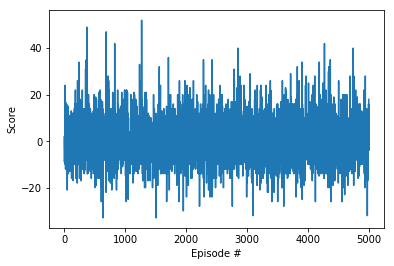

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Trader in Action

In [6]:
state = env.reset()

done = False
while not done:
    action = policy.act(state)

    state, reward, done, _ = env.step(action)
    print('Action', action, 'Price', state, 'Reward', reward, 'Volume', _['volume'], 'balance', _['balance'], done)
    if done:
        print('Profit', _['balance'] - 1000)
        break 



Action 0 Price 115.3 Reward 0 Volume 10 balance 1000 False
Action 0 Price 116.21 Reward 0 Volume 10 balance 1000 False
Action 1 Price 116.33 Reward 1 Volume 11 balance 883 False
Action 1 Price 117.48 Reward -1 Volume 12 balance 766 False
Action 1 Price 118.58 Reward -1 Volume 13 balance 647 False
Action 1 Price 119.35 Reward -1 Volume 14 balance 528 False
Action 2 Price 118.96 Reward 1 Volume 13 balance 647 False
Action 0 Price 119.05 Reward 0 Volume 13 balance 647 False
Action 1 Price 119.61 Reward 1 Volume 14 balance 527 False
Action 1 Price 119.6 Reward -1 Volume 15 balance 408 False
Action 1 Price 119.98 Reward -1 Volume 16 balance 288 False
Action 2 Price 119.4 Reward 1 Volume 15 balance 407 False
Action 2 Price 119.95 Reward -1 Volume 14 balance 527 False
Action 0 Price 120.04 Reward 0 Volume 14 balance 527 False
Action 0 Price 119.56 Reward 0 Volume 14 balance 527 False
Action 1 Price 122.06 Reward 1 Volume 15 balance 405 False
Action 0 Price 122.0 Reward 0 Volume 15 balance 405